In [254]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [255]:
df = pd.read_csv('Mall_Customers.csv')

In [256]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Univariate Analysis

In [257]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


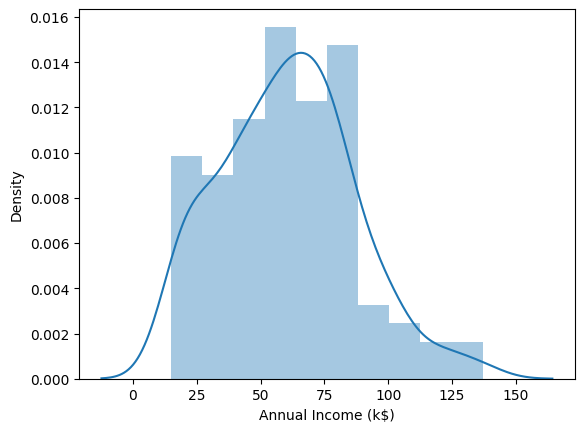

In [258]:
sns.distplot(df['Annual Income (k$)']);

In [259]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

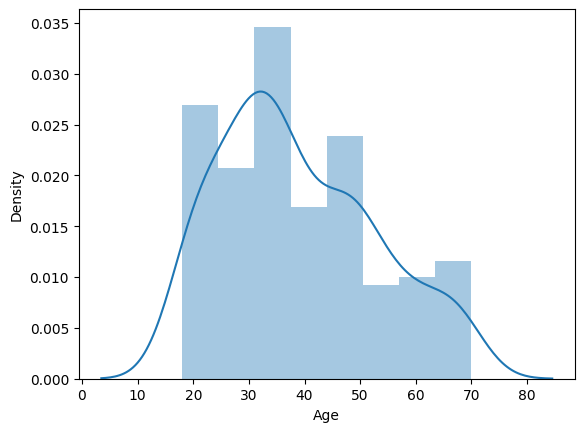

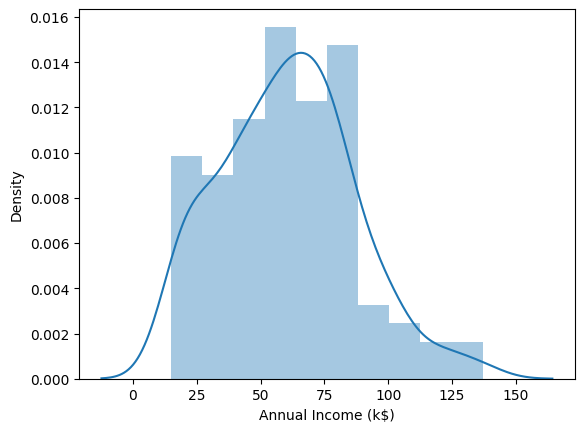

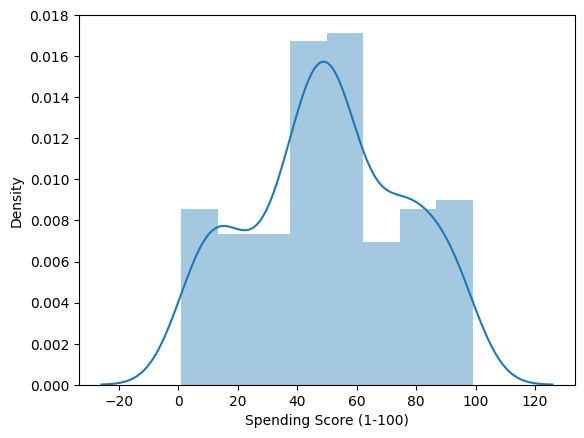

In [260]:
col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in col:
    plt.figure()
    sns.distplot(df[i])

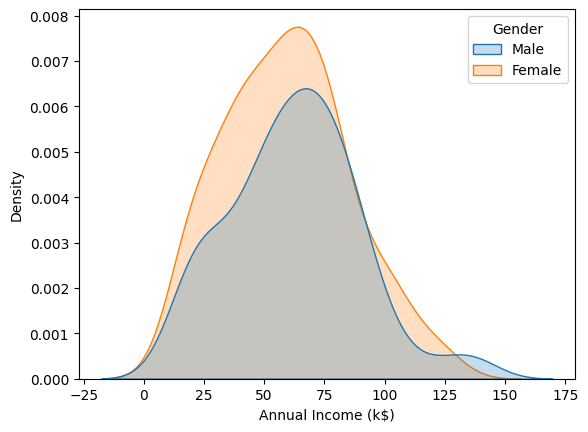

In [261]:
sns.kdeplot(data=df,x = 'Annual Income (k$)',fill=True, hue='Gender');

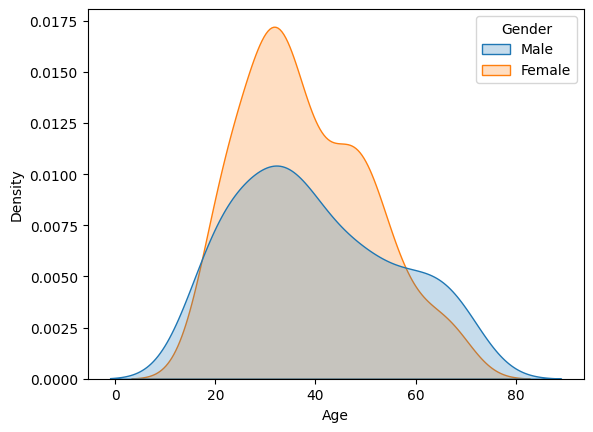

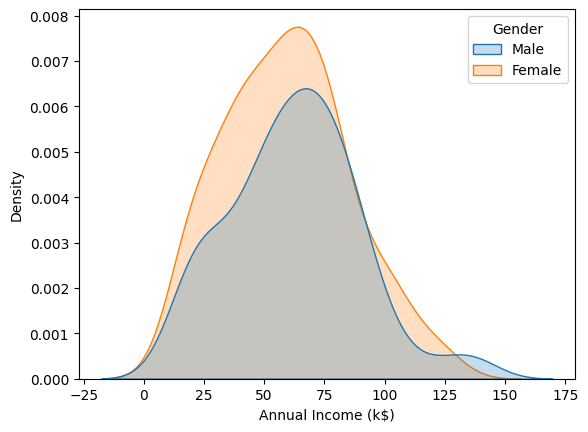

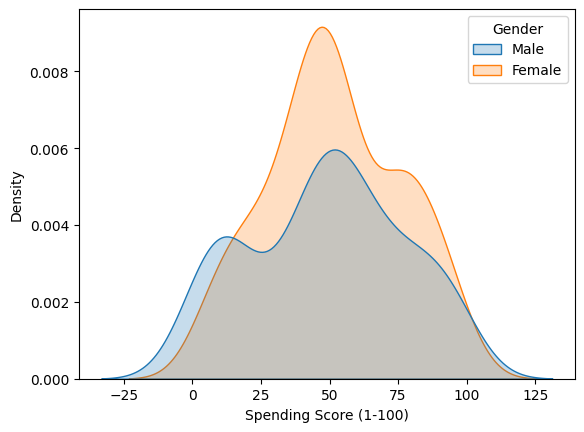

In [262]:
col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in col:
    plt.figure()
    sns.kdeplot(data=df,x = i,fill=True, hue='Gender');

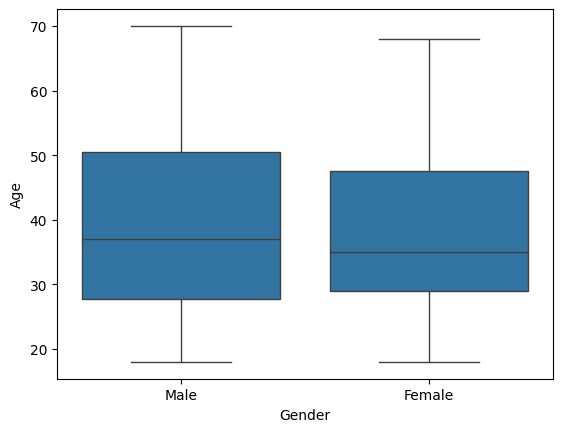

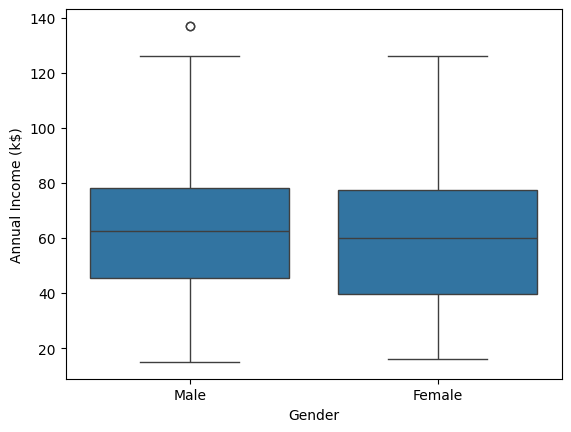

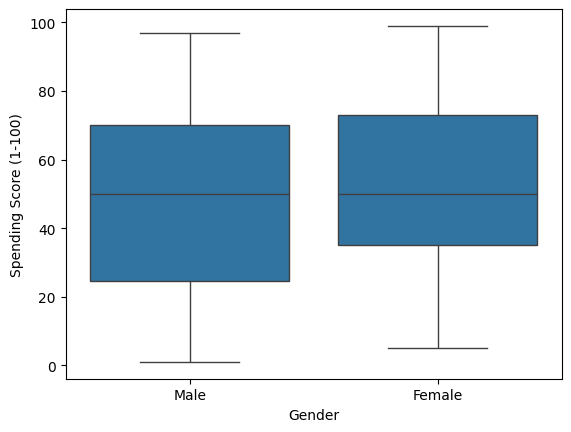

In [263]:
col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in col:
    plt.figure()
    sns.boxplot(data=df,x = 'Gender', y = df[i])

In [264]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

### Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

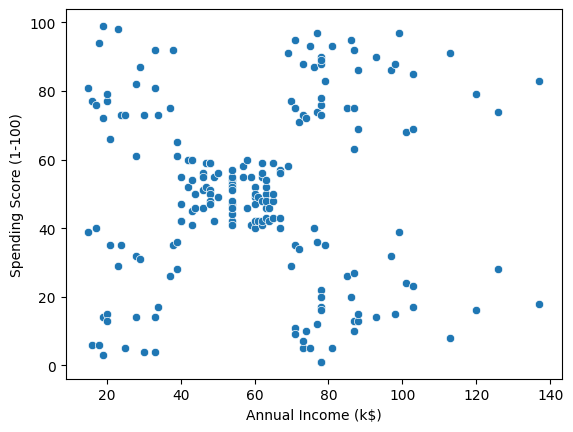

In [265]:
 sns.scatterplot(data=df,x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

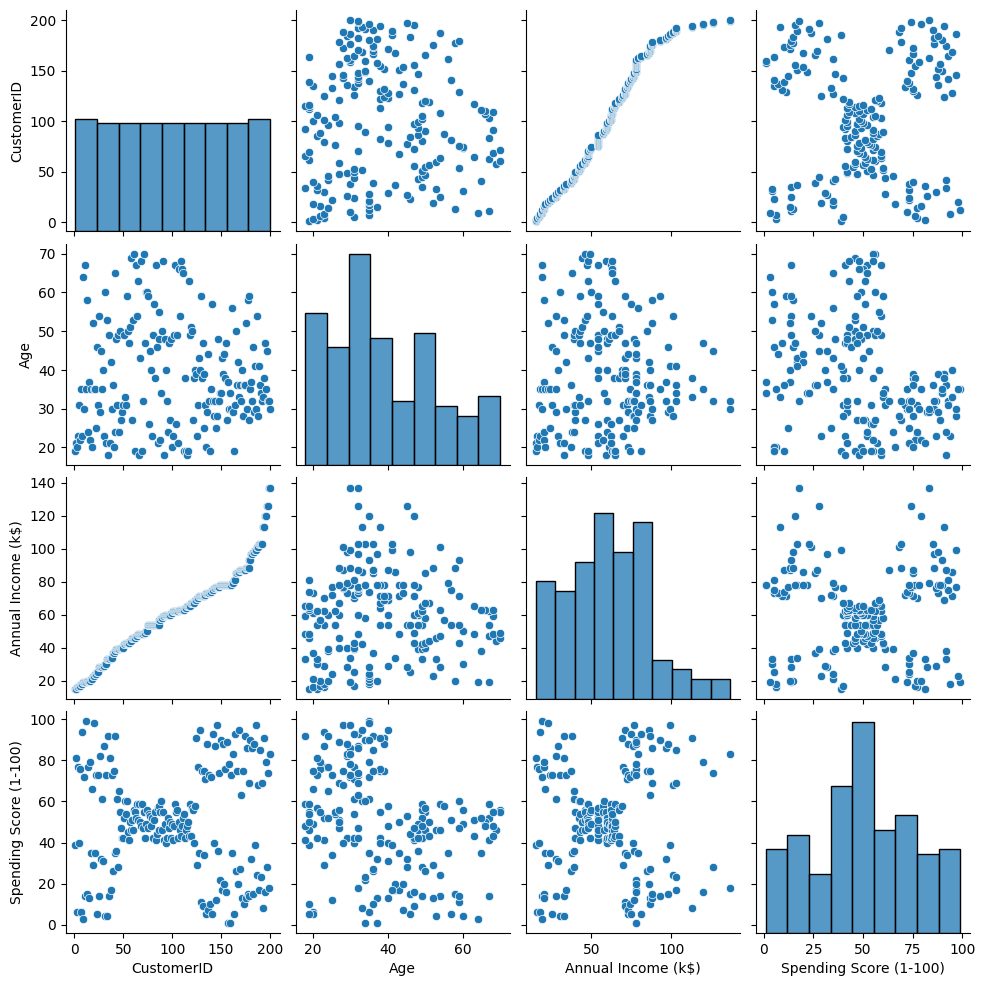

In [266]:
#df=df.drop('CustomerID', axis=1)
sns.pairplot(df)

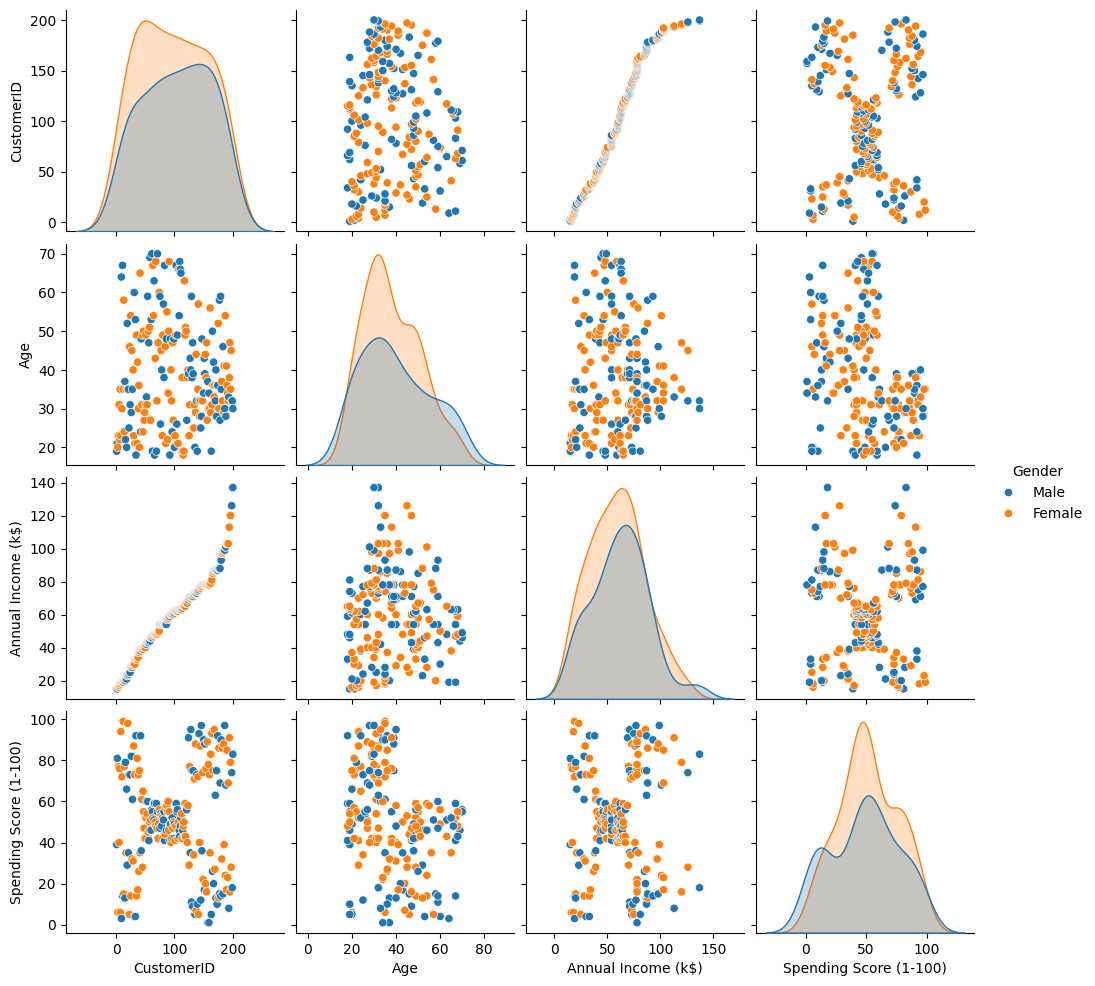

In [267]:
sns.pairplot(df,hue='Gender')

In [268]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [269]:
cor = df[['Age', 'Annual Income (k$)','Spending Score (1-100)']].corr()
print(cor)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


<Axes: >

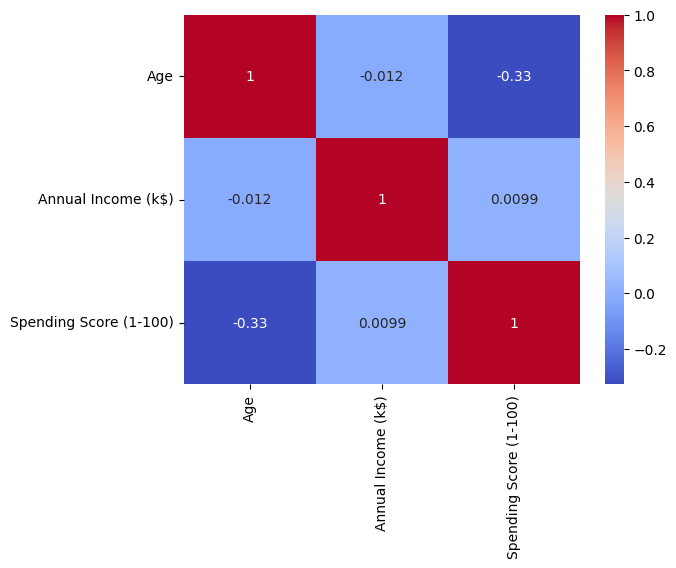

In [270]:
sns.heatmap(cor,annot=True, cmap='coolwarm')

### Clustering - Univariate, Bivaraite, Multivaraite

In [271]:
Clustering1 = KMeans(n_clusters=3)

In [272]:
Clustering1.fit(df[['Annual Income (k$)']])

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [273]:
Clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [274]:
df['Income Cluster'] = Clustering1.labels_

In [275]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [276]:
df['Income Cluster'].value_counts()

Income Cluster
2    92
0    72
1    36
Name: count, dtype: int64

In [277]:
Clustering1.inertia_

23528.152173913055

In [278]:
inertia_score=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)

In [279]:
inertia_score

[137277.28000000003,
 48660.88888888889,
 25640.457784396833,
 13844.222098218706,
 8481.496190476191,
 7102.597955305564,
 4109.45147123408,
 3815.5535505430244,
 2463.2307104660044,
 1776.2834776334776]

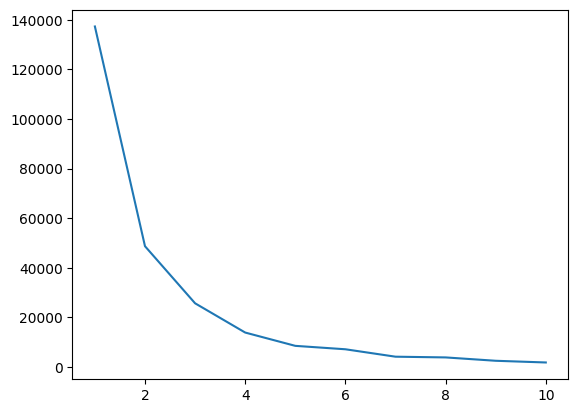

In [280]:
plt.plot(range(1,11),inertia_score)

In [281]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [282]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.930556,33.027778,50.166667
1,37.833333,99.888889,50.638889
2,39.184783,66.717391,50.054348


# Bivariate Clustering

In [283]:
Clustering2 = KMeans(n_clusters=5)
Clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income CLuster'] = Clustering2.labels_
df.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income CLuster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3
5,6,Female,22,17,76,0,4
6,7,Female,35,18,6,0,3
7,8,Female,23,18,94,0,4
8,9,Male,64,19,3,0,3
9,10,Female,30,19,72,0,4


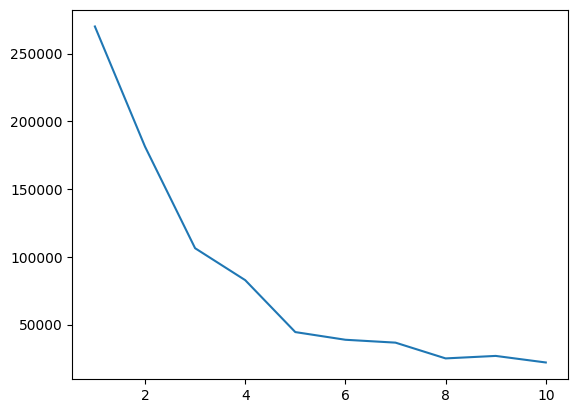

In [284]:
inertia_score2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_score2)

In [285]:
centers = pd.DataFrame(Clustering2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,88.200000,17.114286
1,55.296296,49.518519
2,86.538462,82.128205
3,26.304348,20.913043
4,25.727273,79.363636


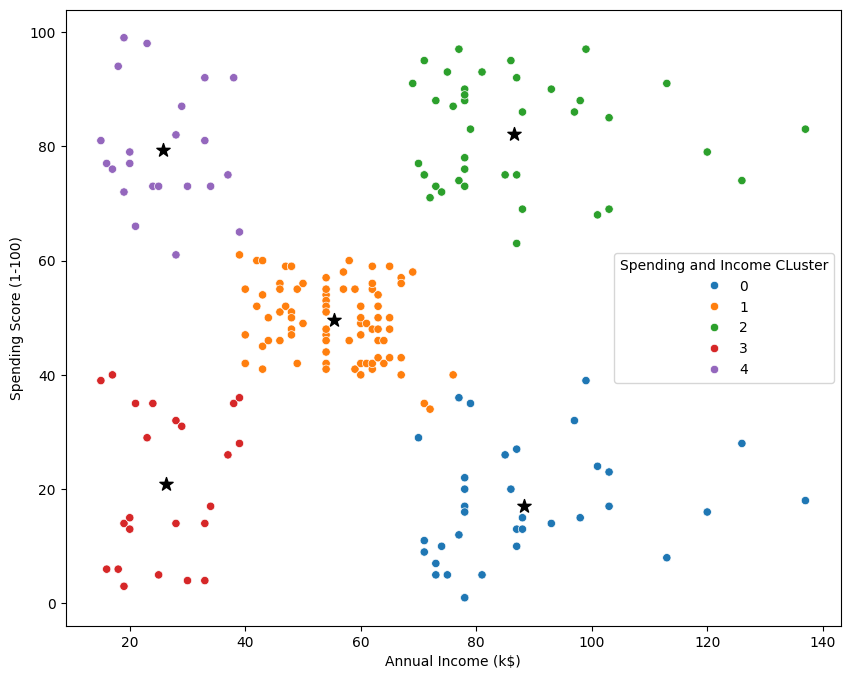

In [286]:
plt.figure(figsize=(10,8))
plt.scatter(x = centers['x'], y = centers['y'], marker='*',s=100,c='k')
sns.scatterplot(data=df, x = 'Annual Income (k$)', y =  'Spending Score (1-100)', hue='Spending and Income CLuster',palette='tab10' )
plt.savefig('Clustering_bivariate.png')

In [287]:
pd.crosstab(df['Spending and Income CLuster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income CLuster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


In [288]:
df.groupby('Spending and Income CLuster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income CLuster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


# Multivariate Cluster

In [289]:
from sklearn.preprocessing import StandardScaler

In [290]:
scale = StandardScaler()

In [291]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income CLuster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3


In [292]:
df1 = pd.get_dummies(df,drop_first=True)
df1

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income CLuster,Gender_Male
0,1,19,15,39,0,3,True
1,2,21,15,81,0,4,True
2,3,20,16,6,0,3,False
3,4,23,16,77,0,4,False
4,5,31,17,40,0,3,False
...,...,...,...,...,...,...,...
195,196,35,120,79,1,2,False
196,197,45,126,28,1,0,False
197,198,32,126,74,1,2,True
198,199,32,137,18,1,0,True


In [293]:
df1 = df1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [294]:
df1 = pd.DataFrame(scale.fit_transform(df1))

In [295]:
df1

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


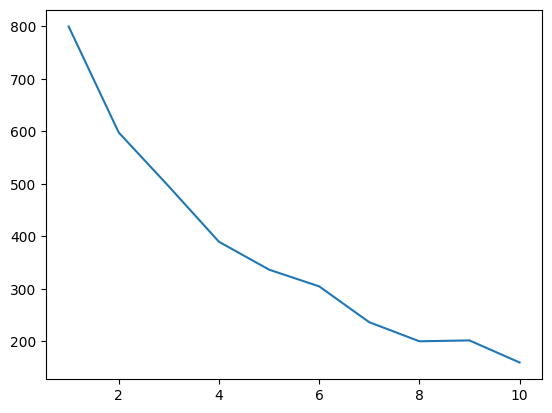

In [296]:
inertia_score3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(df1)
    inertia_score3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_score3)

In [297]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income CLuster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2
196,197,Female,45,126,28,1,0
197,198,Male,32,126,74,1,2
198,199,Male,32,137,18,1,0


In [298]:
df.to_csv('Clustering.csv')